In [81]:
# import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import random

In [82]:
# global BET
# global BANKROLL
# global X
BET = 10
BANKROLL = 1000
X = 40

In [83]:
# Simulation Constant Bet on Red/Black
def ConstRedBlack(amount, bet, x):
    # l = 0
    # w = 0
    for _ in range(1000):
        # continue
        if amount == 0: break
        win = random.randint(1,100)
        if win <= x:
            amount += bet
            # w+=1
            continue
        # l+=1
        amount -= bet
    # print(l,w)
    return amount
        

In [84]:
# Simulation Double Bet on Red/Black
def DoubleRedBlack(amount, bet, x):
    curr_bet = bet
    for _ in range(1000):
        if amount == 0: break
        win = random.randint(1,100)
        if win <= x:
            amount += curr_bet
            curr_bet = bet 
            continue
        amount -= curr_bet
        curr_bet = min(curr_bet*2, amount)
    # print(l,w)
    return amount
        

In [85]:
# Simulation Constant Bet on Green
def ConstGreen(amount, bet, x):
    for _ in range(1000):
        if amount == 0: break
        amount -= bet
        win = random.randint(1,100)
        if win <= x:
            amount += bet*18
    # print(l,w)
    return amount
        

In [86]:
# Simulation Random Bet like a real sattabaaz
def randomNessOP(amount, bet, x):
    xG = 100 - 2*x
    def goGreen(amount):

        amount -= bet
        win = random.randint(1,100)
        if win <= xG:
            amount += bet*18
        return amount
    
    def goRB(amounts):
        amounts -= bet
        win = random.randint(1,100)
        if win <= x:
            amounts += bet
        return amount
    for _ in range(1000):
        if amount == 0: break
        colour = random.choice(["G", "R", "B"])
        if colour == "G":
            amount = goGreen(amount)
        else:
            amount = goRB(amount)
    return amount

In [87]:
def strategy1():
    bankrupt = 0
    result1 = []
    losses = 0
    for _ in range(1000):
        k = ConstRedBlack(BANKROLL, BET, X)
        result1.append(k)
        if k < BANKROLL: losses+=1
        if k == 0: bankrupt+=1
    expected_value = sum(result1)/1000
    bankrupt = result1.count(0)

    # result1.sort()
    return (expected_value, bankrupt, losses)

In [88]:
def strategy2():
    result2 = []
    bankrupt = 0
    losses = 0
    for _ in range(1000):
        k = DoubleRedBlack(BANKROLL, BET, X)
        result2.append(k)
        if k < BANKROLL: losses+=1
        if k == 0: bankrupt+=1
    expected_value = sum(result2)/1000
    bankrupt = result2.count(0)
    return (expected_value, bankrupt, losses)

In [89]:
def strategy3():
    result3 = []
    losses = 0
    bankrupt = 0
    for _ in range(1000):
        k = ConstGreen(BANKROLL, BET, 100 - 2*X)
        result3.append(k)
        if k < BANKROLL: losses+=1
        if k == 0: bankrupt+=1
    expected_value = sum(result3)/1000
    bankrupt = result3.count(0)
    return (expected_value, bankrupt, losses)

In [90]:
def strategy4():
    result4= []
    losses = 0
    bankrupt = 0
    for _ in range(1000):
        k = randomNessOP(BANKROLL, BET, 100 - 2*X)
        result4.append(k)
        if k < BANKROLL: losses+=1
        if k == 0: bankrupt+=1
    expected_value = sum(result4)/1000
    # bankrupt = result4.count(0)
    return (expected_value, bankrupt, losses)

In [91]:
X = 1
simulations = {}
strategy = [strategy1, strategy2, strategy3, strategy4]
while X < 50:
    # print(X)
    output = []
    for i in range(4):
        output.append(strategy[i]())
    simulations[X] = output
    X+=1
print(simulations)

{1: [(0.0, 1000, 1000), (0.0, 1000, 1000), (167377.68, 0, 0), (0.0, 1000, 1000)], 2: [(0.0, 1000, 1000), (0.0, 1000, 1000), (163825.92, 0, 0), (0.0, 1000, 1000)], 3: [(0.0, 1000, 1000), (0.0, 1000, 1000), (160160.4, 0, 0), (0.0, 1000, 1000)], 4: [(0.0, 1000, 1000), (0.0, 1000, 1000), (156601.62, 0, 0), (0.0, 1000, 1000)], 5: [(0.0, 1000, 1000), (0.0, 1000, 1000), (152980.92, 0, 0), (0.0, 1000, 1000)], 6: [(0.0, 1000, 1000), (0.0, 1000, 1000), (149413.32, 0, 0), (0.0, 1000, 1000)], 7: [(0.0, 1000, 1000), (0.0, 1000, 1000), (145776.24, 0, 0), (0.0, 1000, 1000)], 8: [(0.0, 1000, 1000), (0.0, 1000, 1000), (142140.42, 0, 0), (0.0, 1000, 1000)], 9: [(0.0, 1000, 1000), (0.0, 1000, 1000), (138609.9, 0, 0), (0.0, 1000, 1000)], 10: [(0.0, 1000, 1000), (0.0, 1000, 1000), (134944.2, 0, 0), (0.0, 1000, 1000)], 11: [(0.0, 1000, 1000), (0.0, 1000, 1000), (131416.02, 0, 0), (0.0, 1000, 1000)], 12: [(0.0, 1000, 1000), (0.0, 1000, 1000), (127724.4, 0, 0), (0.0, 1000, 1000)], 13: [(0.0, 1000, 1000), (0.0

In [92]:
expected_values = [[] for _ in range(4)]
bankrupts = [[] for _ in range(4)]
losses = [[] for _ in range(4)]
percent_list = list(range(1, 50))
for key, sublist in simulations.items():
    for i in range(4):
        expected_values[i].append(sublist[i][0])
        bankrupts[i].append(sublist[i][1])
        losses[i].append(sublist[i][2])

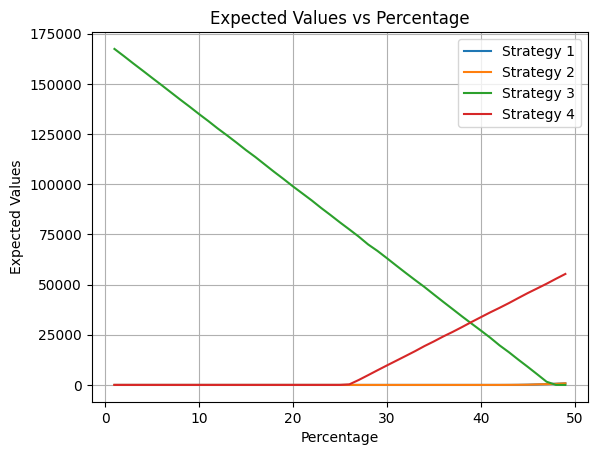

In [93]:
for i in range(4):
    plt.plot(percent_list, expected_values[i], label=f'Strategy {i+1}')

plt.xlabel('Percentage')
plt.ylabel('Expected Values')
plt.title('Expected Values vs Percentage')
plt.legend()
plt.grid(True)

plt.show()

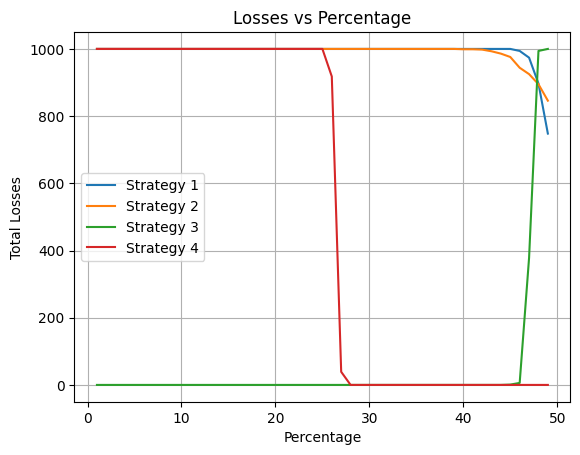

In [94]:
for i in range(4):
    plt.plot(percent_list, losses[i], label=f'Strategy {i+1}')

plt.xlabel('Percentage')
plt.ylabel('Total Losses')
plt.title('Losses vs Percentage')
plt.legend()
plt.grid(True)

plt.show()

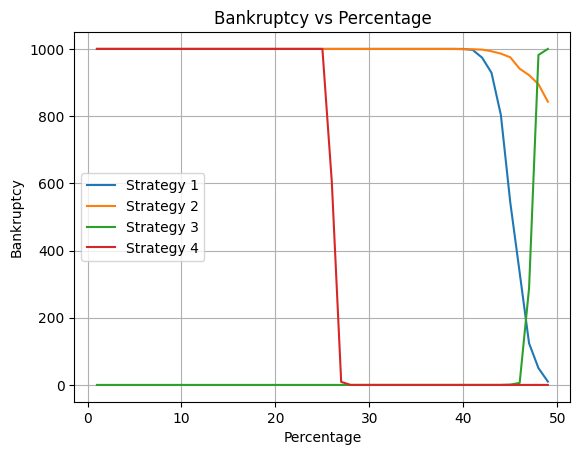

In [95]:
for i in range(4):
    plt.plot(percent_list, bankrupts[i], label=f'Strategy {i+1}')

plt.xlabel('Percentage')
plt.ylabel('Bankruptcy')
plt.title('Bankruptcy vs Percentage')
plt.legend()
plt.grid(True)

plt.show()

# Analysis of different strategy as per the graphs

## Strategy One: Constant Bet on Red/Black
- The strategy is overall bad and is in loss mojority of time for every value of x.
- It has a very high bankruptcy rate also, which reduced drastically after x = 40, but for no use as the loss percent is still too high.
- Expected is zero almost everytime.
- An overall bad strategy, not recommended to use.

## Strategy Two: Doubling Bet on Red/Black
- Similar to the first strategy but worse as the number of bankruptcy doesn't go below 800 as compared to the first one.
- Worse than first, not recommended

## Strategy Three: Constant Bet on Green
- An overall good Strategy, only beaten by strategy 4 after around x = 30.
- It has a low bankrupcy rate, low loss rate for values of x < 43 - 45
- Reliable strategy, recommended for x < 40

## Strategy Four: Random Betting
- It is a very effective strategy after x > 30.
- At start it has a high banckrupcy and loss rate, but it soon overcomes it drastically after x = 23-25 and by x = 30 there are zero bankrupcy and zero loses.
- Expected value is 0 for lower values of x but increases linearly as loss and bankrupcy falls, and it also surpasses strategy 3 for higher values of x.
- Recommended for x > 40.

## Overall Summary:
- Never use strategy 1 and 2.
- Use strategy 3 for x < 40
- Use strategy 4 for x > 40